# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib


from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [2]:
df = pd.read_csv('../data/dayofweek.csv')
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
X  = df.drop('dayofweek',axis=1)
y = df['dayofweek']

In [4]:
X_train, x_test, Y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21)

In [5]:
print("Train:")
print(Y_train.value_counts().sum())

print("\nTest:")
print(y_test.value_counts().sum())

Train:
1348

Test:
338


In [6]:
print("Train class distribution:")
print(Y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Train class distribution:
dayofweek
3    0.232196
6    0.212908
1    0.164688
5    0.160237
2    0.092730
0    0.077893
4    0.059347
Name: proportion, dtype: float64

Test class distribution:
dayofweek
3    0.245562
6    0.204142
5    0.162722
1    0.153846
0    0.091716
4    0.071006
2    0.071006
Name: proportion, dtype: float64


stratify=y ensures that the class distribution (i.e. the proportion of each class label in the target y) is preserved in both the training and test sets during the split.

📘 Why use it?
If your dataset has imbalanced classes, a random split without stratification might result in some classes being overrepresented or missing in one of the sets.

Using stratify=y makes sure that:

The relative proportions of each class in y are similar in both X_train and x_test.

Your model is trained and evaluated on representative data.

In [7]:
X_train, x_test, Y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21,stratify=y)

In [8]:
print("Train class distribution:")
print(Y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Train class distribution:
dayofweek
3    0.234421
6    0.211424
1    0.162463
5    0.160979
2    0.088279
0    0.080861
4    0.061573
Name: proportion, dtype: float64

Test class distribution:
dayofweek
3    0.236686
6    0.210059
1    0.162722
5    0.159763
2    0.088757
0    0.079882
4    0.062130
Name: proportion, dtype: float64


Distribution of train and test is more similar to each other.

## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [9]:
lr = OneVsRestClassifier(LogisticRegression(random_state=21,fit_intercept=True))
lr.fit(X_train,Y_train)

OneVsRestClassifier(estimator=LogisticRegression(random_state=21))

In [10]:
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
accuracy
print(f"Logistic Regression: {accuracy}")

Logistic Regression: 0.621301775147929


### b. SVM

In [11]:
svc = OneVsRestClassifier(SVC(kernel='linear',random_state=21,probability=False))
svc.fit(X_train,Y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', random_state=21))

In [12]:
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print(f"Support Vector Classifier(SVC) accuracy: {accuracy}")

Support Vector Classifier(SVC) accuracy: 0.6183431952662722


### c. Decision tree

In [13]:
dt = DecisionTreeClassifier(max_depth=4, random_state=21)
dt.fit(X_train,Y_train)
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print(f"Decision tree accuracy: {accuracy}")

Decision tree accuracy: 0.5295857988165681


### d. Random forest

In [14]:
rf = RandomForestClassifier(n_estimators=100,max_depth=25,random_state=21)
rf.fit(X_train,Y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"Random forest accuracy: {accuracy}")

Random forest accuracy: 0.9289940828402367


The answer is Random Forest.

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [16]:
logreg = LogisticRegression(fit_intercept=True,random_state=21,solver='liblinear')
score = cross_val_score(logreg,X_train,Y_train,cv=10)
print(f"score = {score} ")
print(f"mean = {score.mean():.4f} with standart deviation = {score.std():.4f}")

score = [0.57037037 0.60740741 0.6        0.60740741 0.57777778 0.59259259
 0.62222222 0.55555556 0.58208955 0.6119403 ] 
mean = 0.5927 with standart deviation = 0.0199


### b. SVM

In [ ]:
svc = SVC(kernel='linear',random_state=21)
score = cross_val_score(svc,X_train,Y_train,cv=10)
print(f"mean = {score.mean():.4f} with standart deviation = {score.std():.4f}")

mean = 0.6587 with standart deviation = 0.0436


### c. Decision tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=4, random_state=21)
score = cross_val_score(dt, X_train,Y_train,cv=10)
print(f"mean = {score.mean():.4f} with standart deviation = {score.std():.4f}")

mean = 0.5089 with standart deviation = 0.0319


### d. Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=25,random_state=21)
score = cross_val_score(rf,X_train,Y_train,cv=10)
print(f"mean = {score.mean():.4f} with standart deviation = {score.std():.4f}")

mean = 0.9177 with standart deviation = 0.0216


The answer is c.


The best and final model is RandomForestClassifier

## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=25,random_state=21)
score = cross_val_score(rf,X_train,Y_train,cv=10)
print(f"mean = {score.mean():.2f} with standart deviation = {score.std():.2f}")

mean = 0.92 with standart deviation = 0.02


In [ ]:
rf = RandomForestClassifier(n_estimators=100,max_depth=25, random_state=21).fit(X_train,Y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print(f"RandomForestClassifier model, accuracy: {accuracy}")

RandomForestClassifier model, accuracy: 0.9289940828402367


In [ ]:
def plot_random_forest_features(model, features, n=10):

    importances = model.feature_importances_
    indices = np.argsort(importances)[-n:]  
    
    plt.figure(figsize=(15, 8))
    plt.barh(range(n), importances[indices])
    plt.yticks(range(n), [features[i] for i in indices])
    plt.xlabel("Feature Importance")
    
    plt.title(f"Top {n} Features from Decision Tree")
    plt.show()

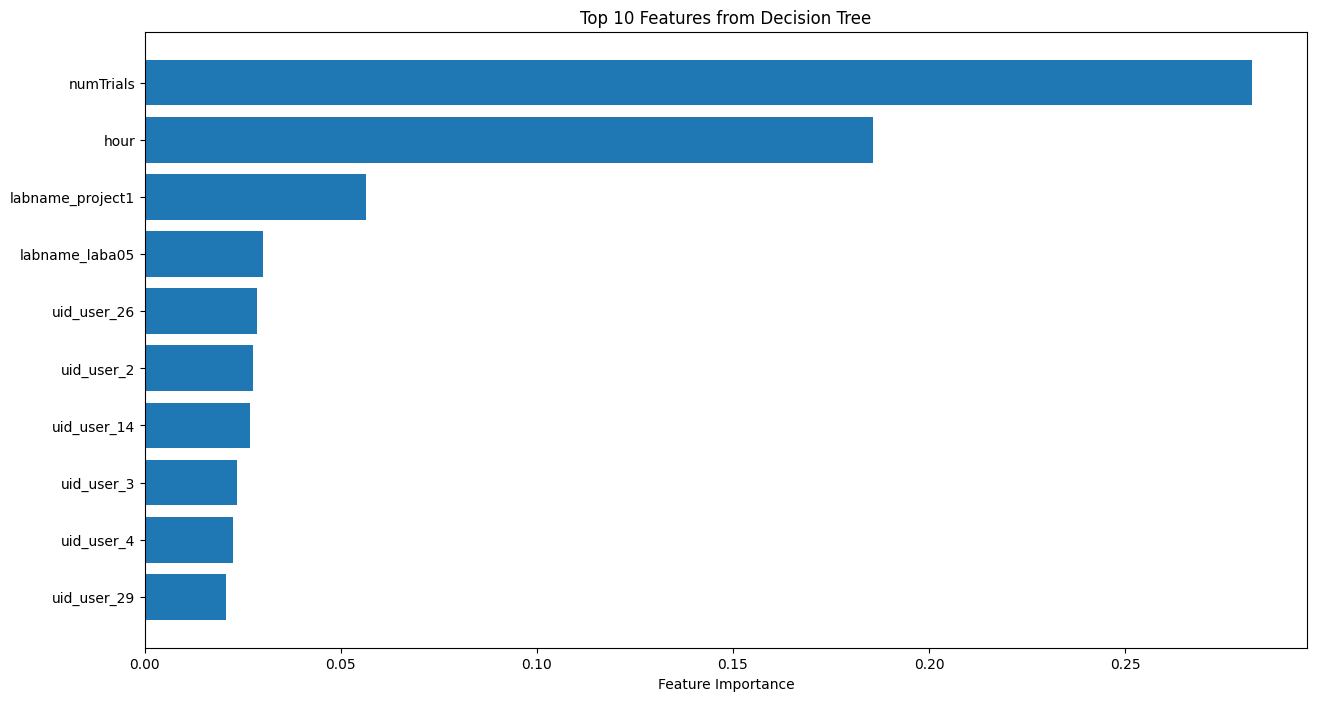

In [ ]:
plot_random_forest_features(rf,X.columns)

In [ ]:
joblib.dump(rf,'../data/RandomforestClassifier.pkl')

['../data/RandomforestClassifier.pkl']

In [ ]:
rf_model = joblib.load('../data/RandomforestClassifier.pkl')

In [ ]:
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print(f"Random Forest Classifier - loaded model, accuracy: {accuracy}")

Random Forest Classifier - loaded model, accuracy: 0.9289940828402367
